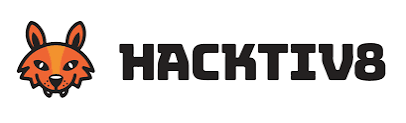

---

# Assigment 3
Tugas ini menggunakan dataset yang didapat dari situs UCI. Data ini terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.
<br>
Ada empat kumpulan data yaitu :
1) bank-additional-full.csv <br>
2) bank-additional.csv <br>
3) bank-full.csv <br>
4) bank.csv <br>

Dari keempat dataset tersebut data yang digunakan adalah data bank.csv
<br>

Kumpulan data terkecil disediakan untuk menguji algoritma pembelajaran mesin yang lebih menuntut komputasi (misalnya, SVM).

Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y).

## Data
**Input variables:**
    
**bank client data:**<br>
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
<br>
**related with the last contact of the current campaign:**<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>
**other attributes:**<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>
**social and economic context attributes**<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)
<br>
**Output variable (desired target):**<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Import Library
Import semua library yang dibutuhkan sebagai berikut:

In [1]:
%matplotlib inline
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import statsmodels.api as sm 

import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = [16, 12]

import seaborn as sns
sns.set(style = 'white', color_codes = True)

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import pickle
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import plot_tree

import sklearn.linear_model as linear_model

# Me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

# Style Text
bold = '\033[1m'
normal = '\033[0m'

## Data Loading

### Import Dataset

In [2]:
# Dilakukan load dataset menggunakan pandas
data = pd.read_csv(r"~/datasets/bank.csv")
pd.set_option("display.max.columns", None)

In [3]:
# Melihat data teratas
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Akan dilihat 5 baris terbawah dari dataset menggunakan fungsi tail()
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


### Type of Data

In [5]:
# menggunakan metode info() untuk mendapatkan informasi dasar tentang kerangka data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### List of Columns

In [6]:
# menggunakan parameter .columns.values untuk mendapatkan list header kolom
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

### Index

In [7]:
# Menggunakan parameter .index untuk mendapatkan daftar indeks
data.index.values

array([   0,    1,    2, ..., 4518, 4519, 4520], dtype=int64)

### Number of Rows and Columns

In [8]:
# Menggunakan parameter .shape untuk mengetahui jumlah baris dan kolom pada dataset
data.shape

(4521, 17)

In [9]:
# Menghitung jumlah nilai unik pada setiap kolom
data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

### Missing Values

In [10]:
#Mengecek missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Terlihat bahwa tidak terdapat missing value dari data.

### Data Duplikat

In [11]:
data.duplicated().any()

False

In [12]:
data.duplicated().value_counts()

False    4521
dtype: int64

Terlihat tidak terdapat data duplikat.

In [13]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
data.shape

(4521, 17)

In [15]:
for col in data.columns:
    print(col, ': ')
    print(data[col].value_counts())
    print('\n','*'*60,'\n')

age : 
34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64

 ************************************************************ 

job : 
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

 ************************************************************ 

marital : 
married     2797
single      1196
divorced     528
Name: marital, dtype: int64

 ************************************************************ 

education : 
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

 ************************************************************ 

default : 
no     4445
yes      76
Name: default, dtype: int64

 **********************************

## Data Exploration

In [16]:
# Membuat dataframe baru : data_copy
data_copy = data.copy()

# Menunjukkan 5 data teratas
data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Visualizing Data

#### Melihat Jumlah Klien Berlangganan Berdasarkan Usia

In [17]:
# membuat dataframe yang berisi data klien berlangganan dan tidak berlangganan berdasarkan usia
yes1=pd.DataFrame(data_copy[data_copy['y']=="yes"].groupby(['age'])['age'].count())
yes1.rename(columns={'age':'Berlangganan'}, inplace=True)
no1=pd.DataFrame(data_copy[data_copy['y']=="no"].groupby(['age'])['age'].count())
no1.rename(columns={'age':'Tidak_Berlangganan'}, inplace=True)
data_usia=pd.concat([yes1,no1], axis=1).reset_index()
data_usia=data_usia.sort_values(by=['age']).reset_index(drop=True)
data_usia

,age,Berlangganan,Tidak_Berlangganan
0,19,2.0,2.0
1,20,1.0,2.0
2,21,1.0,6.0
3,22,3.0,6.0
4,23,2.0,18.0
...,...,...,...
62,81,NaN,1.0
63,83,2.0,2.0
64,84,1.0,NaN
65,86,NaN,1.0


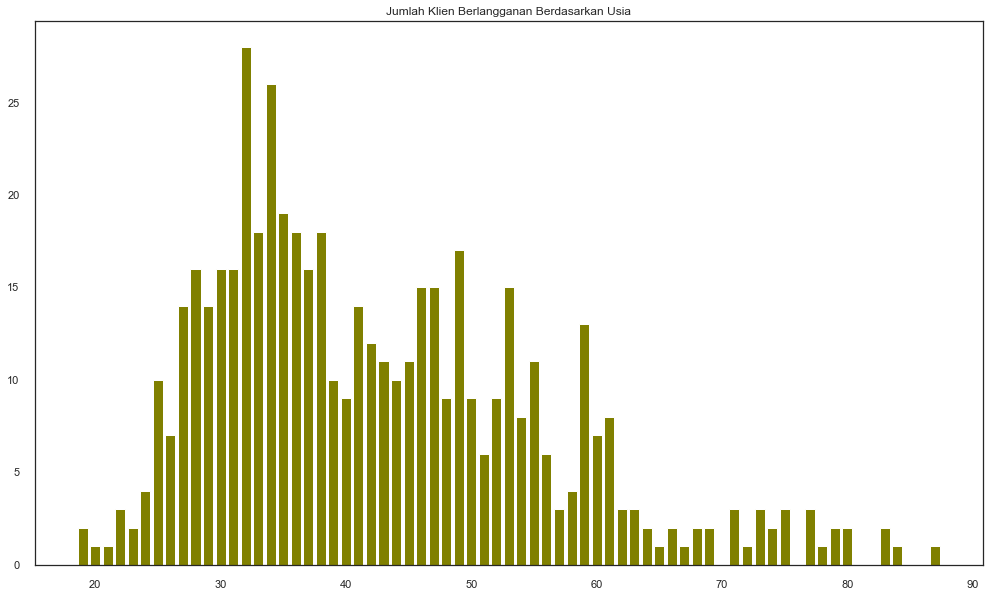

In [19]:
# variabel yang akan digunakan pada plot
x = data_usia['age']
y1 = data_usia['Berlangganan']
y2 = data_usia['Tidak_Berlangganan']

# inisiasi plot
plt.figure(figsize=(17,10))
plt.bar(x, y1, color='olive')

# membuat judul pada plot
plt.title('Jumlah Klien Berlangganan Berdasarkan Usia')

# menampilkan plot
plt.show()

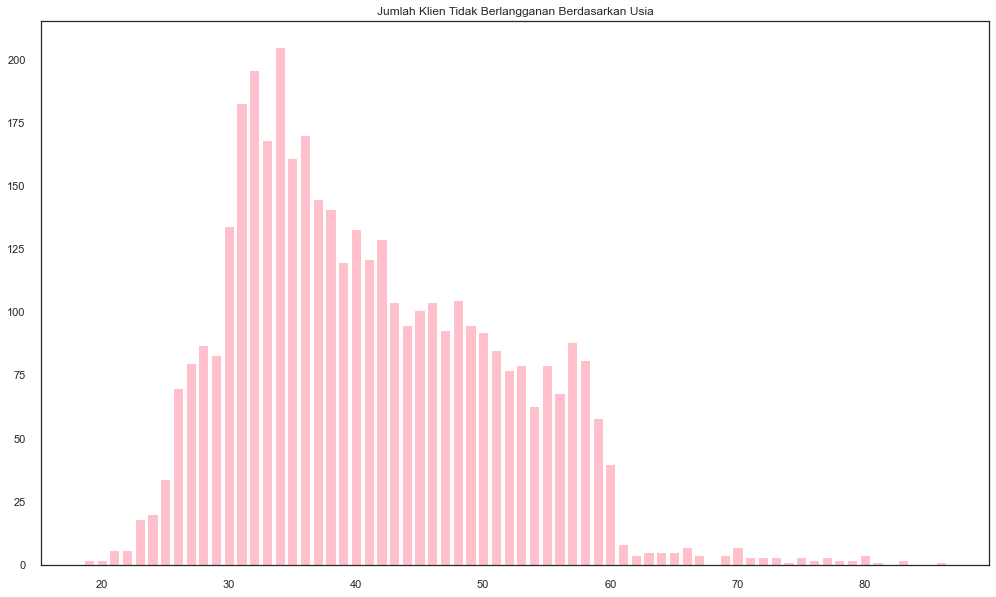

In [20]:
# variabel yang akan digunakan pada plot
x = data_usia['age']
y1 = data_usia['Berlangganan']
y2 = data_usia['Tidak_Berlangganan']

# inisiasi plot
plt.figure(figsize=(17,10))
plt.bar(x, y2, color='pink')

# membuat judul pada plot
plt.title('Jumlah Klien Tidak Berlangganan Berdasarkan Usia')

# menampilkan plot
plt.show()

<b> Kesimpulan  </b>:\
Berdasarkan histogram di atas, terlihat bahwa usia klien yang berlangganan paling banyak pada usia 32 tahun dan diikuti pada usia 34 tahun. Sedangkan usia klien yang tidak berlangganan paling banyak pada usia 34 tahun dan diikuti pada usia 32 tahun.

#### Melihat Jumlah Pekerjaan Klien

In [21]:
# Melihat 
data_pk = pd.DataFrame(data_copy['job'].value_counts())
data_pk

,job
management,969
blue-collar,946
technician,768
admin.,478
services,417
retired,230
self-employed,183
entrepreneur,168
unemployed,128
housemaid,112


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


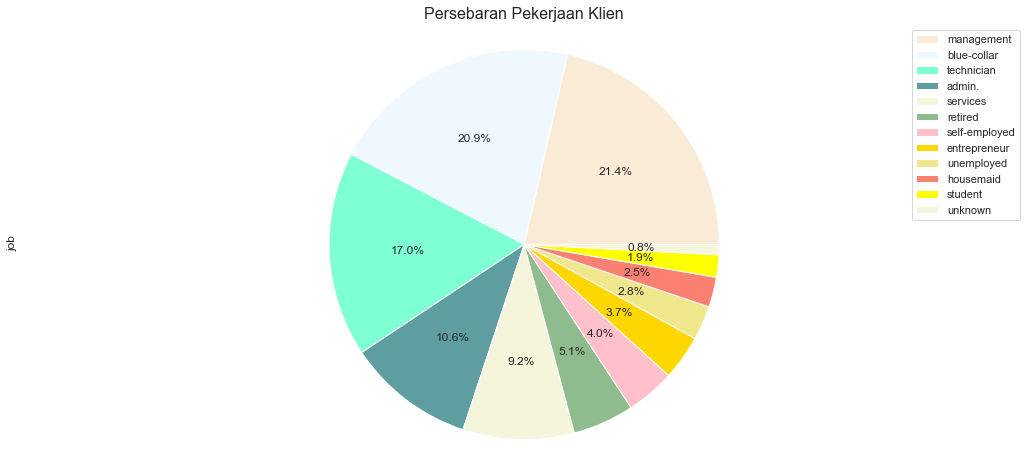

In [22]:
# Membuat pie chart dari jangka waktu kredit
color_list=['antiquewhite', 'aliceblue', 'aquamarine', 'cadetblue', 'beige','darkseagreen',
           'pink', 'gold', 'khaki', 'salmon', 'yellow', 'beige' ]
data_pk.plot(kind='pie', figsize=(18,8),
                               autopct='%1.1f%%',
                                colors=color_list,labels=None,
                                subplots=True)
plt.title('Persebaran Pekerjaan Klien', fontsize=16)
plt.axis('equal')
plt.legend(labels=data_pk.index)

<b>Kesimpulan</b>

Dari pie chart dengan persentase diatas terlihat bahwa pesebaran pekerjaan klien didominasi oleh management diikuti dengan blue-collar, dengan rician pesebarana sebagai berikut:
1. Management dengan persentase 21.4%
2. Blue-collar dengan persentase 20.9%
3. Technician dengan persentase 17.0%
4. Admin dengan persentase 10.6%
5. Services dengan persentase 9.2%
6. Retired dengan persentase 5.1%
7. Self employed dengan persentase 4.0%
8. Enterpreneur dengan persentase 3.7%
9. Unemployed dengan persentase 2.8%
10. Housemaid dengan persentase 2.5%
11. Student dengan persentase 1.9%
12. Unknown dengan persentase 0.8%

#### Melihat Jumlah Klien Berlangganan Berdasarkan Memiliki Kredit

In [23]:
# membuat dataframe yang berisi data klien berlangganan dan tidak berlangganan berdasarkan usia
yes2=pd.DataFrame(data_copy[data_copy['y']=="yes"].groupby(['default'])['default'].count())
yes2.rename(columns={'default':'Berlangganan'}, inplace=True)
no2=pd.DataFrame(data_copy[data_copy['y']=="no"].groupby(['default'])['default'].count())
no2.rename(columns={'default':'Tidak_Berlangganan'}, inplace=True)
data_kredit=pd.concat([yes2,no2], axis=1).reset_index()
data_kredit=data_kredit.sort_values(by=['default']).reset_index(drop=True)
data_kredit

,default,Berlangganan,Tidak_Berlangganan
0,no,512,3933
1,yes,9,67


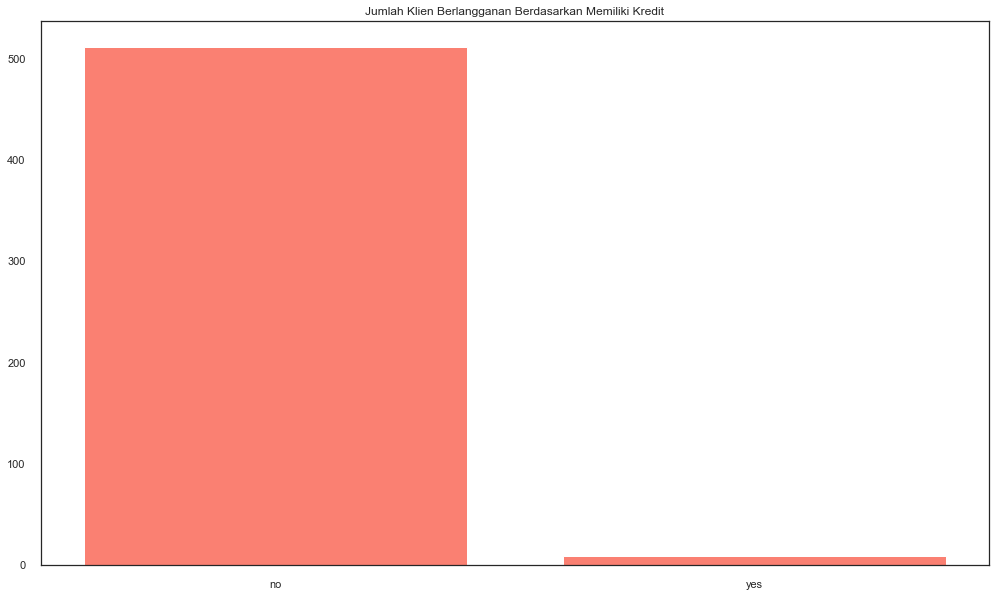

In [24]:
# variabel yang akan digunakan pada plot
x = data_kredit['default']
y1 = data_kredit['Berlangganan']
y2 = data_kredit['Tidak_Berlangganan']

# inisiasi plot
plt.figure(figsize=(17,10))
plt.bar(x, y1, color='salmon')

# membuat judul pada plot
plt.title('Jumlah Klien Berlangganan Berdasarkan Memiliki Kredit')

# menampilkan plot
plt.show()

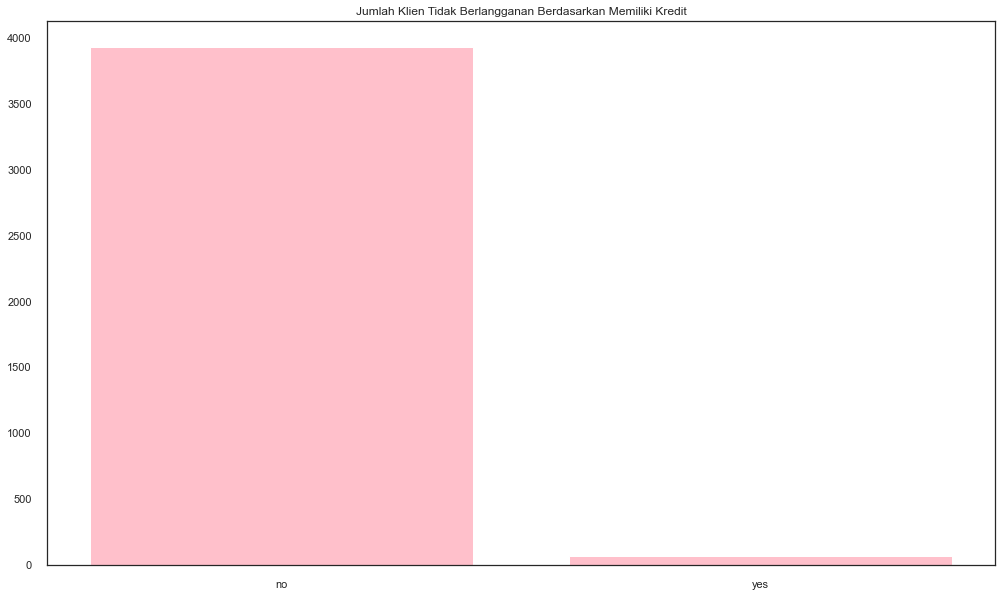

In [25]:
# variabel yang akan digunakan pada plot
x = data_kredit['default']
y1 = data_kredit['Berlangganan']
y2 = data_kredit['Tidak_Berlangganan']

# inisiasi plot
plt.figure(figsize=(17,10))
plt.bar(x, y2, color='pink')

# membuat judul pada plot
plt.title('Jumlah Klien Tidak Berlangganan Berdasarkan Memiliki Kredit')

# menampilkan plot
plt.show()

<b> Kesimpulan  </b>:\
Berdasarkan histogram di atas, terlihat bahwa klien yang berlangganan banyak idak memiliki kredit dengan jumlah 512 klien sedangkan yang memiliki kredit hanya 9 klien. Untuk klien yang tidak berlangganan didominasi oleh klien yang tidak memiliki kredit dengan jumlah 3933 klien sedangkan yang memiliki kredit sebanyak 67 klien.\
Maka dapat disimpulkan bahwa klien didominasi oleh tidak berlangganan dan tidak memiliki kredit.

## Data Preprocessing

In [26]:
# Defining dataset
columns_num = ['age', 'balance', 'day', 'duration', 'pdays', 'previous', 'campaign']
columns_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
columns_features = ['age', 'balance', 'day', 'duration', 'pdays', 'previous', 'job', 'marital', 'education',
                    'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'campaign']
columns_bool = ['y']

In [28]:
le = preprocessing.LabelEncoder()
# Mengubah tipe beberapa kolom
for col in columns_cat:
    data_copy[col] = le.fit_transform(data_copy[col])
    
for col in columns_bool:
    data_copy[col] = le.fit_transform(data_copy[col])

In [29]:
data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


### Splitting Data

In [30]:
# Memisahkan variabel independen dan dependen
X = data_copy.drop(columns='y')
y = data_copy['y']

# Membagi data untuk training dan testing dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# Melihat jumlah data training dan data testing
print(X_train.shape)
print(X_test.shape)

(3616, 16)
(905, 16)


## Generating Model

### Logistic Regression

#### Defining Model

In [32]:
model_LR = LogisticRegression()

#### Model Evaluation

In [33]:
# Training Model
model_LR.fit(X_train, y_train)

# Testing Model
y_pred1 = model_LR.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred1)

print(classification_report(y_test,y_pred1))

#Ringkasan Evaluasi Model  Logistic Regression Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Logistic Regression Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred1),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred1),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred1),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred1),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       793
           1       0.56      0.21      0.30       112

    accuracy                           0.88       905
   macro avg       0.73      0.59      0.62       905
weighted avg       0.86      0.88      0.86       905

 Ringkasan Evaluasi Model Logistic Regression Classifier 
Akurasi :  0.8818 
Presisi :  0.561 
Recall :  0.2054 
F1 Score :  0.3007 


<AxesSubplot:>

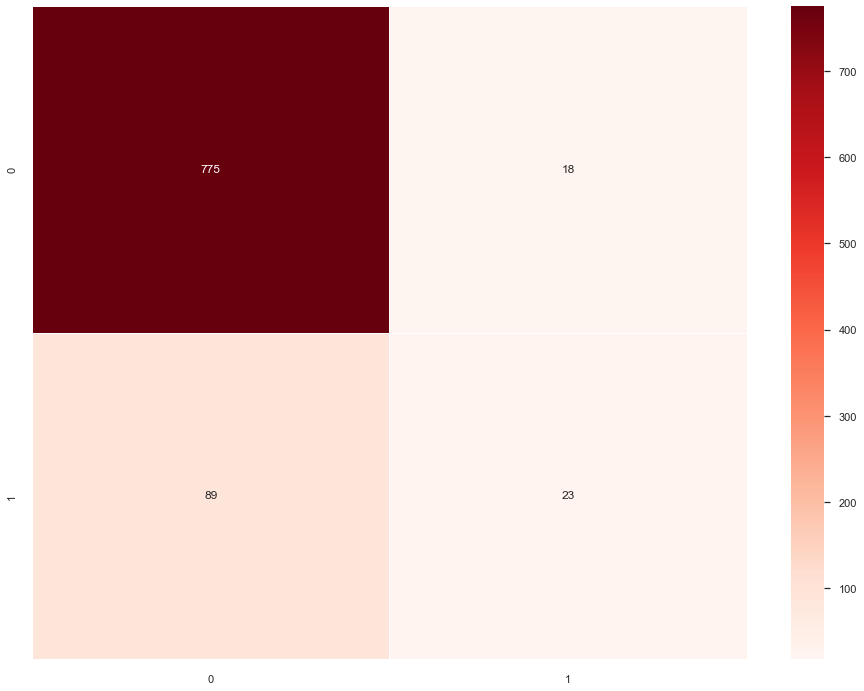

In [34]:
# Melihat confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

<b> Kesimpulan  </b>:\
Dengan menggunakan pembagian data training dan data testing sebesar 80% didapat nilai akurasi menggunakan Logistic Regression sebesar 88,18%.

###  K-Nearest Neighbor

In [35]:
# Dilakukan standarisasi data untuk penggunaan algoritma K-Nearest Neighbor
scaler = StandardScaler()
scaler.fit(X_train)

X1_train = scaler.transform(X_train)
X1_test = scaler.transform(X_test)

In [36]:
# Menetukan nilai K
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y_train)
    pred_i = knn.predict(X1_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

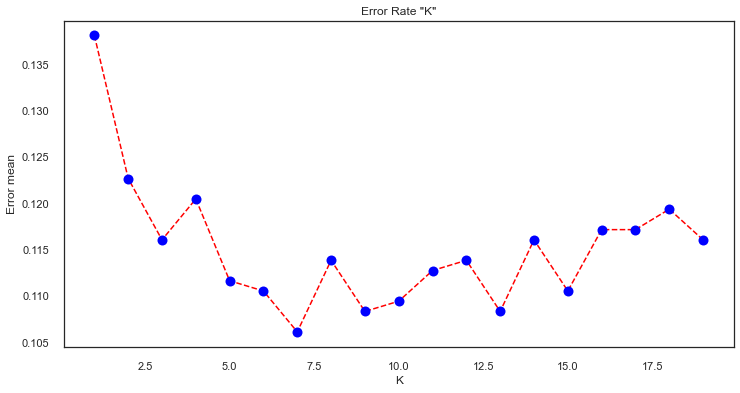

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate "K"')
plt.xlabel('K')
plt.ylabel('Error mean')

maka akan dicoba dengan menggunakan K = 7

#### Defining Model

In [38]:
model_KNN = KNeighborsClassifier(n_neighbors=7)

#### Model Evaluation

In [39]:
# Training Model
model_KNN.fit(X1_train, y_train)

# Testing Model
y_pred2 = model_KNN.predict(X1_test)

# Evaluasi model
confusion_matrix(y_test,y_pred2)

print(classification_report(y_test,y_pred2))

#Ringkasan Evaluasi Model K-Nearest Neighbor Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model K-Nearest Neighbor Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred2),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred2),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred2),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred2),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       793
           1       0.72      0.23      0.35       112

    accuracy                           0.89       905
   macro avg       0.81      0.61      0.65       905
weighted avg       0.88      0.89      0.87       905

 Ringkasan Evaluasi Model K-Nearest Neighbor Classifier 
Akurasi :  0.8939 
Presisi :  0.7222 
Recall :  0.2321 
F1 Score :  0.3514 


<AxesSubplot:>

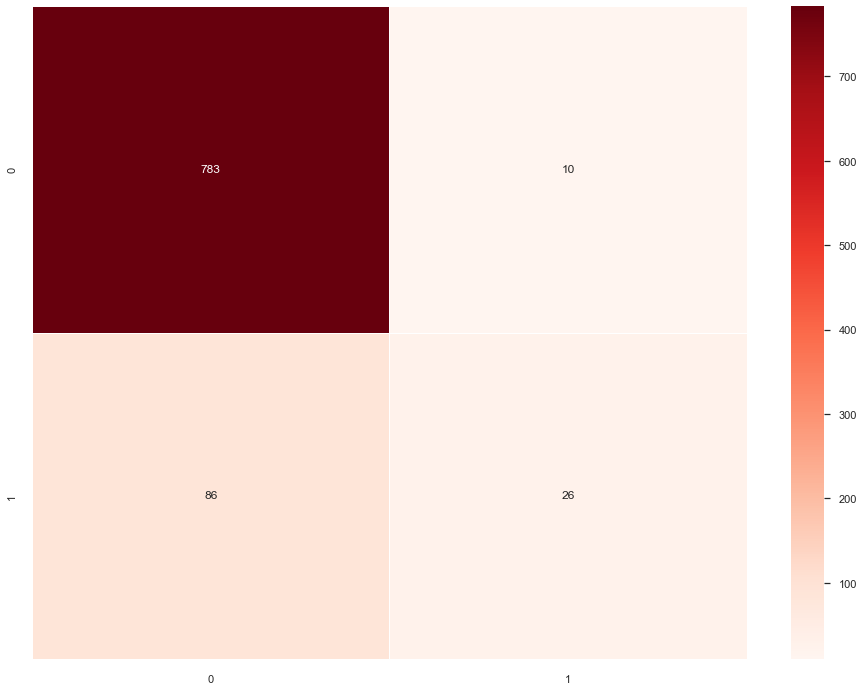

In [40]:
# Melihat confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

<b> Kesimpulan  </b>:\
Dengan menggunakan pembagian data training dan data testing sebesar 80% didapat nilai akurasi menggunakan K-Nearest Neighbors sebesar 89,39%.

### Support Vector Machine
#### Defining Model

In [41]:
model_SVM = svm.SVC()

#### Model Evaluation

In [42]:
# Training Model
model_SVM.fit(X_train, y_train)

# Testing Model
y_pred3 = model_SVM.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred3)

print(classification_report(y_test,y_pred3))

#Ringkasan Evaluasi Model Support Vector Machine Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Support Vector Machine Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred3),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred3),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred3),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred3),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       793
           1       0.00      0.00      0.00       112

    accuracy                           0.88       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.77      0.88      0.82       905

 Ringkasan Evaluasi Model Support Vector Machine Classifier 
Akurasi :  0.8762 
Presisi :  0.0 
Recall :  0.0 
F1 Score :  0.0 


<AxesSubplot:>

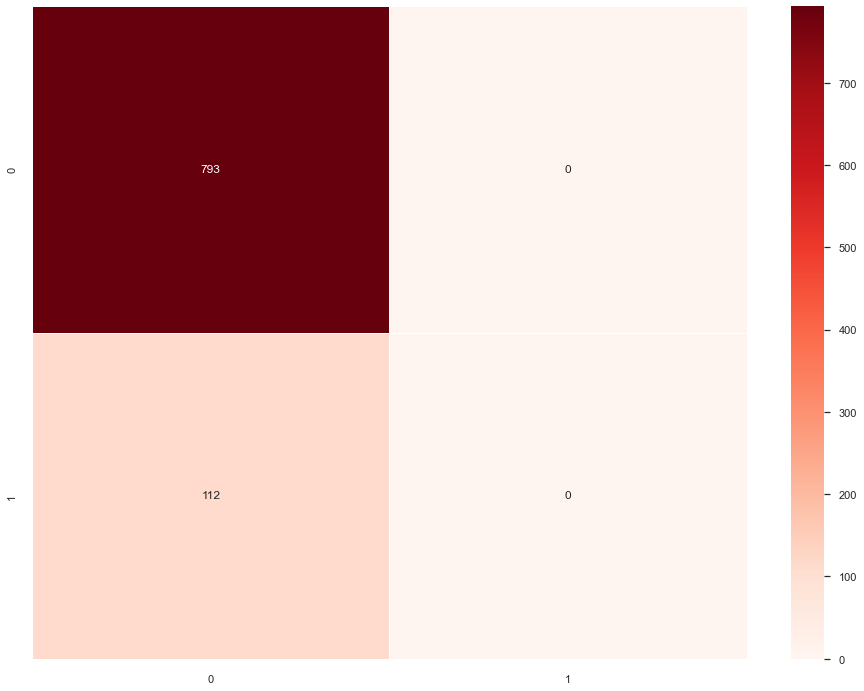

In [43]:
# Melihat confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

<b> Kesimpulan  </b>:\
Dengan menggunakan pembagian data training dan data testing sebesar 80% didapat nilai akurasi menggunakan Support Vector Machine sebesar 87,62%.

### Decision Tree
#### Defining Model

In [44]:
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [45]:
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3)

#### Model Evaluation

In [46]:
# Training Model
model_DT.fit(X_train, y_train)

# Testing Model
y_pred4 = model_DT.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred4)

print(classification_report(y_test,y_pred4))

#Ringkasan Evaluasi Model Decision Tree Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Decision Tree Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred4),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred4),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred4),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred4),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       793
           1       0.54      0.30      0.39       112

    accuracy                           0.88       905
   macro avg       0.72      0.63      0.66       905
weighted avg       0.86      0.88      0.87       905

 Ringkasan Evaluasi Model Decision Tree Classifier 
Akurasi :  0.8818 
Presisi :  0.5397 
Recall :  0.3036 
F1 Score :  0.3886 


<AxesSubplot:>

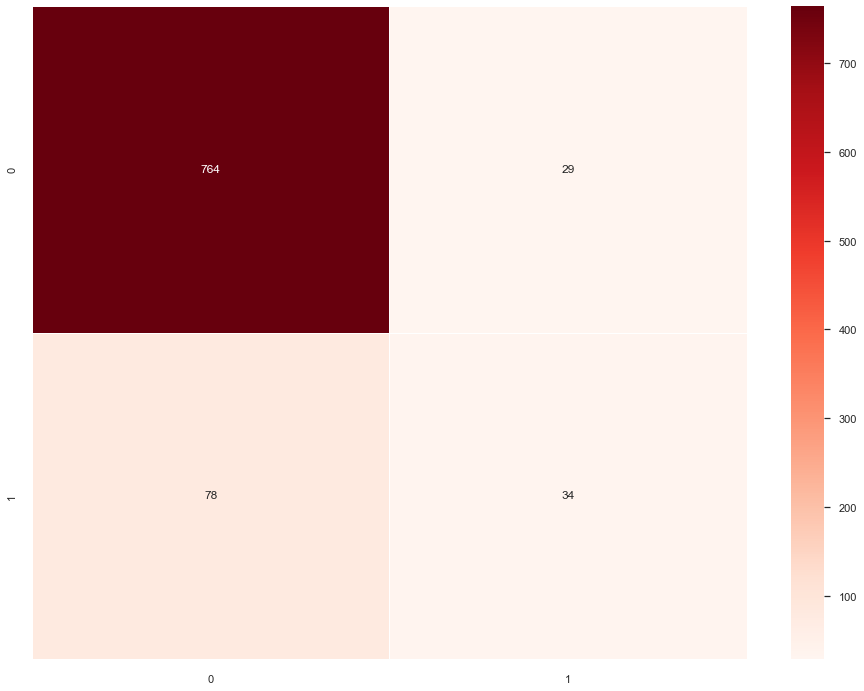

In [47]:
# Melihat confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm4, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

<b> Kesimpulan  </b>:\
Dengan menggunakan pembagian data training dan data testing sebesar 80% didapat nilai akurasi menggunakan Support Vector Machine sebesar 88,18%.

#### Visualisasi Decision Tree

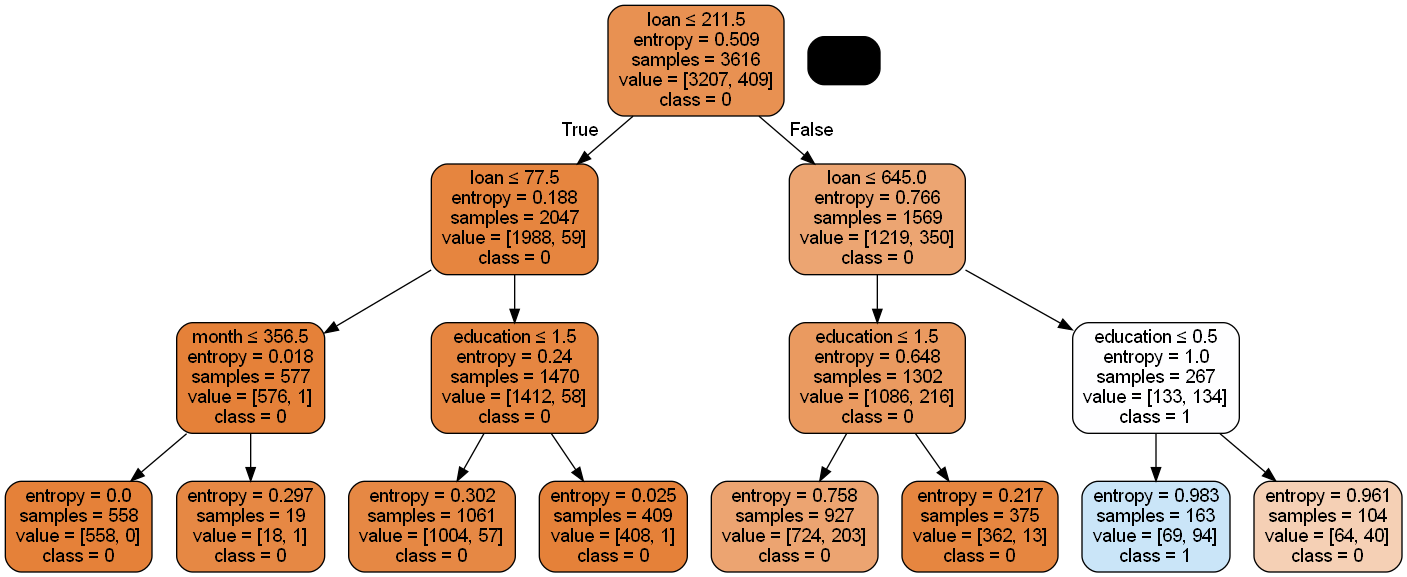

In [48]:
dot_data = StringIO()
tree.export_graphviz(model_DT,
                    out_file=dot_data,
                    class_names=['0','1'],
                    feature_names=columns_features,
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest
#### Defining Model

In [49]:
model_RF = RandomForestClassifier(n_estimators=100)

#### Model Evaluation

In [50]:
# Training Model
model_RF.fit(X_train, y_train)

# Testing Model
y_pred5 = model_RF.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred5)

print(classification_report(y_test,y_pred5))

#Ringkasan Evaluasi Model Random Forest Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Random Forest Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred5),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred5),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred5),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred5),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       793
           1       0.60      0.36      0.45       112

    accuracy                           0.89       905
   macro avg       0.76      0.66      0.69       905
weighted avg       0.87      0.89      0.88       905

 Ringkasan Evaluasi Model Random Forest Classifier 
Akurasi :  0.8906 
Presisi :  0.597 
Recall :  0.3571 
F1 Score :  0.4469 


<AxesSubplot:>

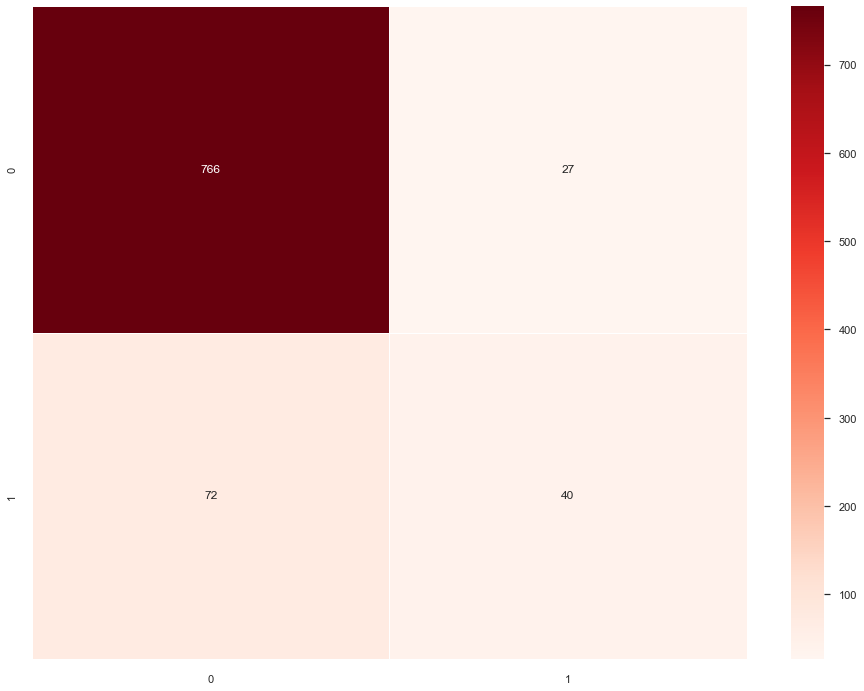

In [51]:
# Melihat confusion matrix
cm5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm5, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

In [52]:
feature_im = pd.Series(model_RF.feature_importances_, index=columns_features).sort_values(ascending=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


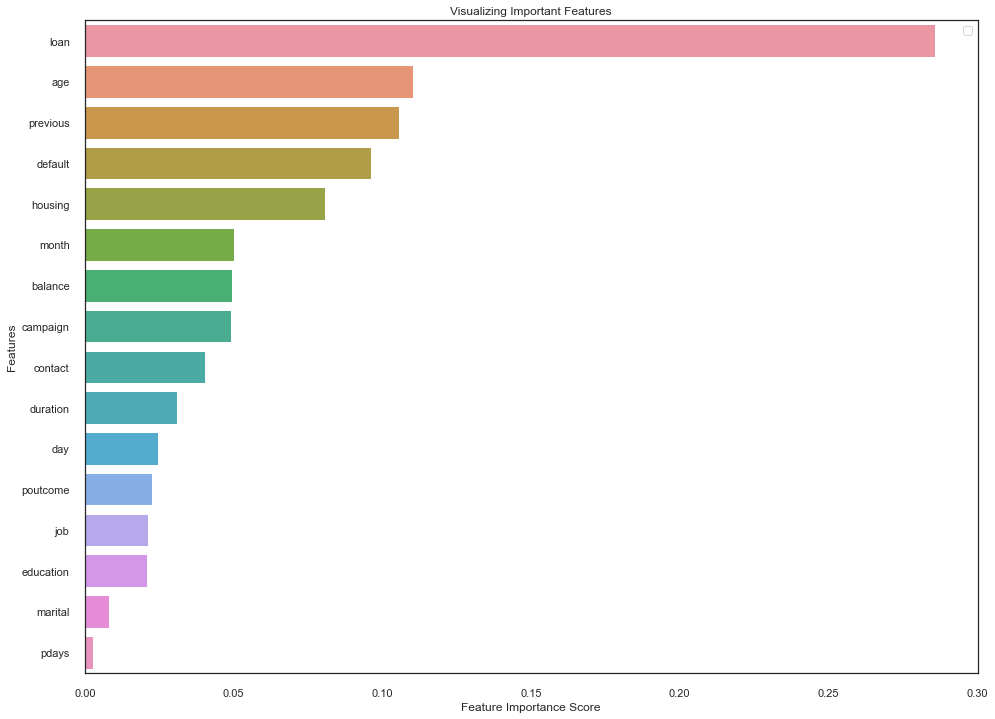

In [53]:
# Membuat visualisasi 
sns.barplot(x=feature_im, y=feature_im.index)

# Pemberian label
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

<b> Kesimpulan  </b>:\
Dengan menggunakan pembagian data training dan data testing sebesar 80% didapat nilai akurasi menggunakan Random Forest sebesar 89,06%.

### Naive Bayes
#### Defining Model

In [54]:
model_NB = GaussianNB()

#### Model Evaluation

In [55]:
# Training Model
model_NB.fit(X_train, y_train)

# Testing Model
y_pred6 = model_NB.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred6)

print(classification_report(y_test,y_pred6))

#Ringkasan Evaluasi Model Naive Bayes Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Naive Bayes Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred6),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred6),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred6),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred6),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       793
           1       0.32      0.46      0.38       112

    accuracy                           0.81       905
   macro avg       0.62      0.66      0.63       905
weighted avg       0.84      0.81      0.83       905

 Ringkasan Evaluasi Model Naive Bayes Classifier 
Akurasi :  0.8133 
Presisi :  0.3208 
Recall :  0.4554 
F1 Score :  0.3764 


<AxesSubplot:>

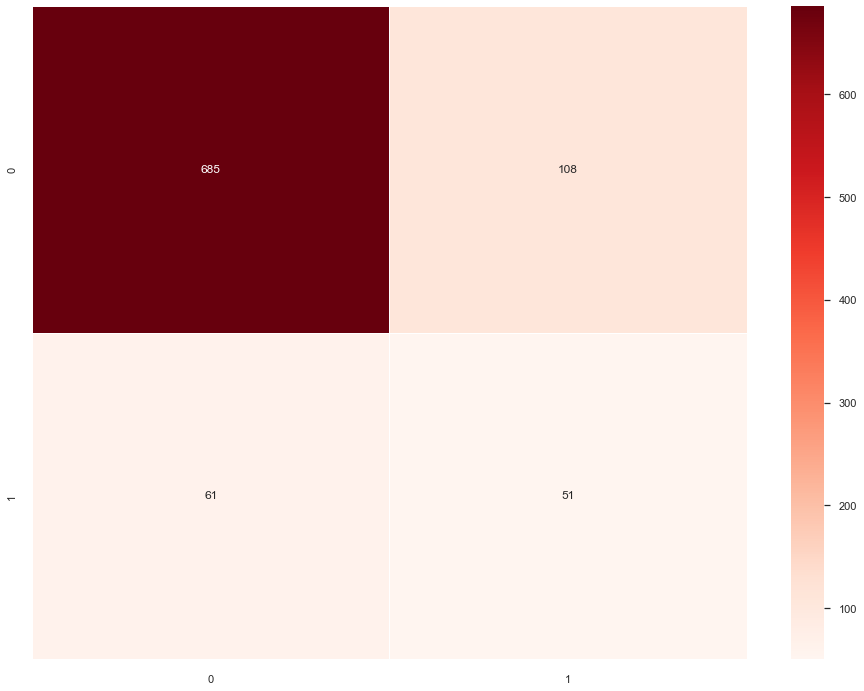

In [56]:
# Melihat confusion matrix
cm6 = confusion_matrix(y_test, y_pred6)
sns.heatmap(cm6, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

<b> Kesimpulan  </b>:\
Dengan menggunakan pembagian data training dan data testing sebesar 80% didapat nilai akurasi menggunakan Naive Bayes sebesar 81,33%.

In [57]:
print('Accuracy of Logistic Regression classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred1)))
print('Accuracy of KNN classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred2)))
print('Accuracy of SVM classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred3)))
print('Accuracy of Decision Tree classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred4)))
print('Accuracy of Random Forest classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred5)))
print('Accuracy of Naive Bayes classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred6)))

Accuracy of Logistic Regression classifier on test set: 0.88177
Accuracy of KNN classifier on test set: 0.89392
Accuracy of SVM classifier on test set: 0.87624
Accuracy of Decision Tree classifier on test set: 0.88177
Accuracy of Random Forest classifier on test set: 0.89061
Accuracy of Naive Bayes classifier on test set: 0.81326


## Kesimpulan

Setelah dilakukan klasifikasi menggunakan enam algoritma yaitu Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, dan Naive Bayes didapat algoritma yang baik digunakan dalam memprediksi klien berlangganan atau tidak adalah algoritma **K-Nearest Neighbors** dengan akurasi sebesar **89,39%** dengan pembagian data training 80% dan data testing 20%. Maka dapat diartikan algoritma **K-Nearest Neighbors** memprediksi dengan akurat. 